<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

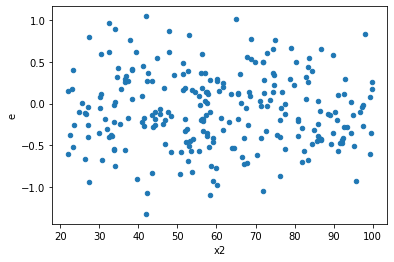

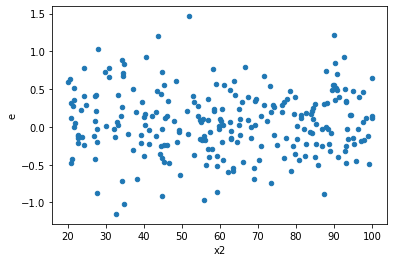

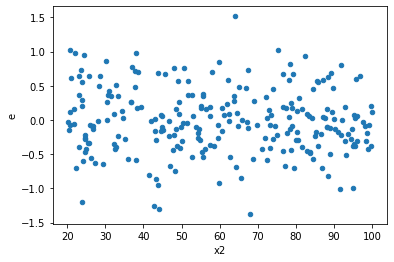

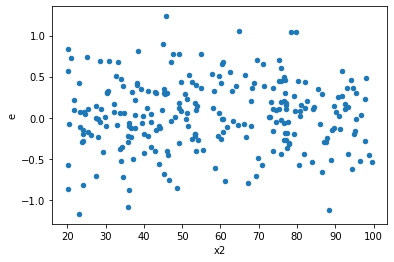

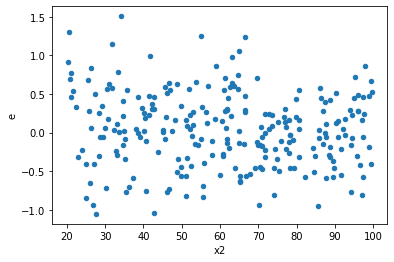

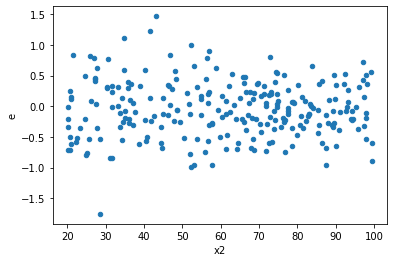

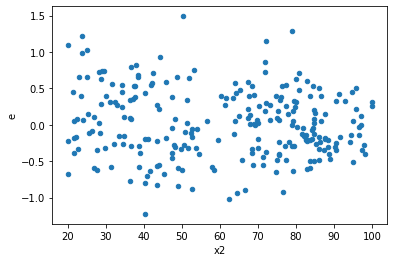

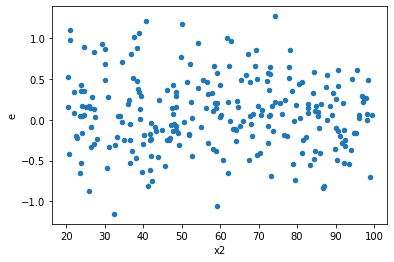

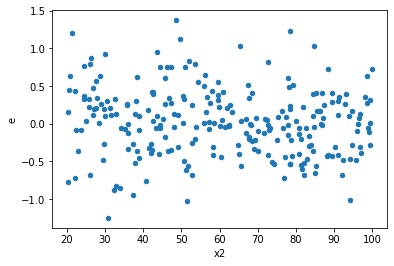

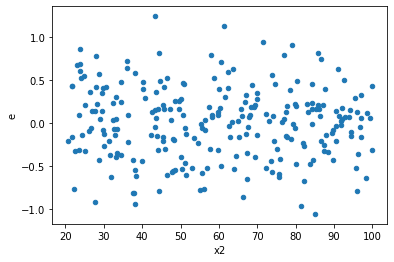

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
31.0,96.0,96.0,14.777130164036905,15.009228707701219,0.15392843920871777,0.15634613237188769,1.0157066048067418,0.9393002705018869,0.5303498647490565,0.46965013525094346,Reject001=1 : Homoscedasticity
60.0,96.0,96.0,19.02385249486831,19.229735783920546,0.19816513015487824,0.20030974774917235,1.0108223762304596,0.9580534170329404,0.5209732914835298,0.4790267085164702,Reject001=1 : Homoscedasticity
72.0,96.0,96.0,18.63719125986592,20.811168386831575,0.19413740895693665,0.21678300402949557,1.1166472510075693,0.589910517235817,0.7050447413820915,0.2949552586179085,Reject001=1 : Homoscedasticity
82.0,96.0,96.0,17.001267651063163,17.395795604084086,0.17709653803190795,0.18120620420920922,1.0232057962452141,0.910750306101995,0.5446248469490025,0.4553751530509975,Reject001=1 : Homoscedasticity
88.0,96.0,96.0,16.63333210685459,18.790017933306316,0.17326387611306862,0.1957293534719408,1.1296604800888308,0.5514876920532799,0.7242561539733601,0.2757438460266399,Reject001=1 : Homoscedasticity
101.0,96.0,96.0,19.29027449395349,21.104089630202935,0.2009403593120155,0.21983426698128058,1.0940274404502635,0.6606383362022132,0.6696808318988934,0.3303191681011066,Reject001=1 : Homoscedasticity
110.0,96.0,96.0,16.557930268395953,17.985391829755695,0.17247844029579118,0.18734783155995516,1.0862101445181425,0.6862063454812488,0.6568968272593756,0.3431031727406244,Reject001=1 : Homoscedasticity
117.0,96.0,96.0,15.399196700998873,17.296862287119097,0.16040829896873826,0.18017564882415726,1.1232314660931069,0.5702594508312082,0.7148702745843959,0.2851297254156041,Reject001=1 : Homoscedasticity
155.0,96.0,96.0,17.40443169966587,17.69722745469327,0.18129616353818614,0.18434611931972156,1.0168230574878823,0.935030631807908,0.532484684096046,0.467515315903954,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,21.569770213181773,16.53834938308238,0.22468510638731012,0.17227447274044147,0.7667373931028446,0.19499502563212098,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,21.234399388295817,13.641253795375547,0.2211916602947481,0.1420963937018286,0.6424129802745664,0.031273551407050744,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,25.454836843573126,16.60560255797766,0.26515455045388675,0.17297502664560063,0.6523554898435842,0.03758063634537981,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,19.51124204385952,14.277208732133296,0.20324210462353667,0.14872092429305517,0.7317426896780539,0.1277525550403827,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,25.226420067759992,13.29148706356538,0.26277520903916657,0.13845299024547272,0.5268875658085248,0.0019038578695473381,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,27.752033243563837,13.463629155717882,0.2890836796204566,0.14024613703872793,0.48514027918442065,0.00047057595849912863,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,26.97189051249666,14.407213565118607,0.2809571928385069,0.1500751413033188,0.5341566086531246,0.002369714137587255,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,21.215946368467726,15.236827418922754,0.22099944133820548,0.15871695228044536,0.7181780701316507,0.10655592281017182,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,25.057857534284203,15.06304882247974,0.26101934931546045,0.15690675856749728,0.6011307551681324,0.013375075719906641,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      804
Reject001=0 : Heteroscedasticity    196
Name: Result_test, dtype: int64